In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cross_validation as skcv

import datatools
from models import MeanModel, SimpleModel, StandardModel
from solver import Solver

In [6]:
amz_books_url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Books.csv'  # 22,507,155
amz_elec_url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Electronics.csv'  # 7,824,482
amz_vgames_url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Video_Games.csv'  # 1,324,753
amz_instr_url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Musical_Instruments.csv'  # 500,176

filename = datatools.cached_download(amz_instr_url)
unique_users, uid_map, unique_items, iid_map, X, y = datatools.parse_amazon_csv(filename, ',')
X = np.array(X)
y = np.array(y)

# cross validation split
# use random_state=42 for deterministic split
X_train, X_test, y_train, y_test = skcv.train_test_split(X, y, test_size=0.25)

len(unique_users), len(unique_items)


(339231, 83046)

In [7]:
nUsers = 1 + max(X_train[:, 0].max(), X_test[:, 0].max())
nItems = 1 + max(X_train[:, 1].max(), X_test[:, 1].max())
nUsers, nItems


(339231, 83046)

In [8]:
data = {
    'X_train': X_train,
    'y_train': y_train,
    'X_val': X_test,
    'y_val': y_test
}

In [9]:
model = SimpleModel(nUsers, nItems)
solver = Solver(model, data,
                update_rule='adam',
                optim_config={
                    'learning_rate': 1e-2,
                },
                lr_decay=0.9,
                num_epochs=10, batch_size=400,
                print_every=100)

In [10]:
solver.train()

(Iteration 1 / 9370) loss: 19.545000
(Epoch 0 / 10) train loss: 19.281012; val_loss: 19.406377
(Iteration 101 / 9370) loss: 11.375763
(Iteration 201 / 9370) loss: 6.119376
(Iteration 301 / 9370) loss: 3.441659
(Iteration 401 / 9370) loss: 2.292111
(Iteration 501 / 9370) loss: 1.706768
(Iteration 601 / 9370) loss: 1.414054
(Iteration 701 / 9370) loss: 1.561206
(Iteration 801 / 9370) loss: 1.095368
(Iteration 901 / 9370) loss: 1.315670
(Epoch 1 / 10) train loss: 1.139650; val_loss: 1.408747
(Iteration 1001 / 9370) loss: 1.053755
(Iteration 1101 / 9370) loss: 1.038186
(Iteration 1201 / 9370) loss: 1.092092
(Iteration 1301 / 9370) loss: 1.147575
(Iteration 1401 / 9370) loss: 0.849179
(Iteration 1501 / 9370) loss: 0.977114
(Iteration 1601 / 9370) loss: 0.922829
(Iteration 1701 / 9370) loss: 0.925564
(Iteration 1801 / 9370) loss: 0.875057
(Epoch 2 / 10) train loss: 0.858467; val_loss: 1.345200
(Iteration 1901 / 9370) loss: 0.916410
(Iteration 2001 / 9370) loss: 0.840274
(Iteration 2101 / 937

(0, 2)

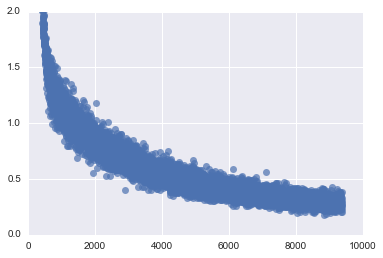

In [11]:
plt.plot(solver.loss_history, 'o', alpha=0.7)
plt.ylim((0, 2))

(0, 2)

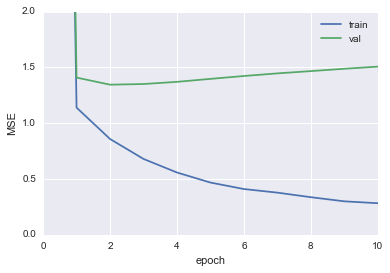

In [12]:
def plotTrainTest(solver):
    plt.plot(solver.train_loss_history, label='train')
    plt.plot(solver.val_loss_history, label='val')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('MSE')
    
plotTrainTest(solver)
plt.ylim((0, 2))

In [13]:
mse, _ = model.loss(X_test, y_test, use_reg=False)
mse

1.3451997492420675

In [15]:
model2 = MeanModel()

In [16]:
model2.fit(y_train)

In [17]:
mse, _ = model2.loss(X_test, y_test)
mse

1.4405988367727314

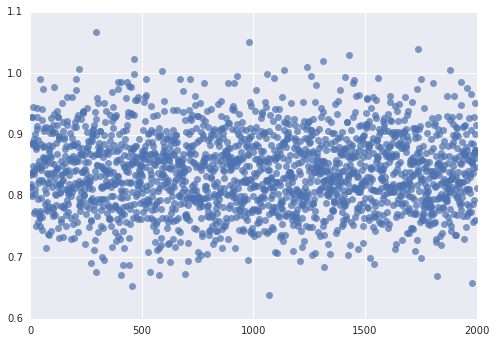

In [312]:
plt.plot(solver2.loss_history, 'o', alpha=0.7)

In [24]:
model3 = StandardModel(nUsers, nItems, latentDim=10, reg=1e-3)
for p, v in model.params.items():
    model3.params[p] = v.copy()
    
solver3 = Solver(model3, data,
                update_rule='adam',
                optim_config={
                    'learning_rate': 3e-4,
                },
                lr_decay=1,
                num_epochs=10, batch_size=1000,
                print_every=100)
solver3.train()

(Iteration 1 / 3750) loss: 0.875759
(Epoch 0 / 10) train loss: 0.847081; val_loss: 1.345135
(Iteration 101 / 3750) loss: 0.972311
(Iteration 201 / 3750) loss: 0.885837
(Iteration 301 / 3750) loss: 0.827039
(Epoch 1 / 10) train loss: 0.864132; val_loss: 1.344585
(Iteration 401 / 3750) loss: 0.848706
(Iteration 501 / 3750) loss: 0.791624
(Iteration 601 / 3750) loss: 0.875789
(Iteration 701 / 3750) loss: 0.910303
(Epoch 2 / 10) train loss: 0.859263; val_loss: 1.343523
(Iteration 801 / 3750) loss: 0.837977
(Iteration 901 / 3750) loss: 0.832248
(Iteration 1001 / 3750) loss: 0.841173
(Iteration 1101 / 3750) loss: 0.835411
(Epoch 3 / 10) train loss: 0.821408; val_loss: 1.344509
(Iteration 1201 / 3750) loss: 0.811617
(Iteration 1301 / 3750) loss: 0.801998
(Iteration 1401 / 3750) loss: 0.736268
(Epoch 4 / 10) train loss: 0.803325; val_loss: 1.344002
(Iteration 1501 / 3750) loss: 0.755840
(Iteration 1601 / 3750) loss: 0.862732
(Iteration 1701 / 3750) loss: 0.874829
(Iteration 1801 / 3750) loss: 

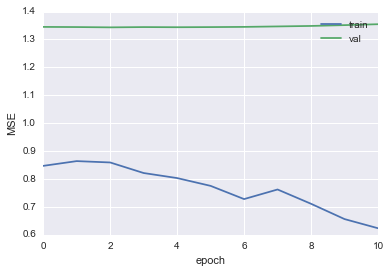

In [25]:
plotTrainTest(solver3)

In [26]:
mse, _ = model3.loss(X_test, y_test, use_reg=False)
mse

1.3435230177057451